In [19]:
import pandas as pd
import statistics as st
from scipy.stats import norm

In [5]:
score=pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
score

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [7]:
# Task 1
Mean=[]
Median=[]
Mode=[]
for col in score:
    Mean.append(score.loc[:,col].mean())
    Median.append(score.loc[:,col].median())
    Mode.append(st.mode(score[col]))
row_head=["Mean","Median","Mode"]   
col_names=["Statistics","Python","Tableau"]   
d_data=pd.DataFrame([Mean,Median,Mode], columns = col_names)
d_data
d_data.insert(0,'Measures',row_head,True)
d_data

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


In [9]:
# Task 2
Mean=[]
SD=[]
CV=[]
for mark in score:
    col_mean=(score.loc[:,mark].mean())
    Mean.append(col_mean)
    col_SD=(score.loc[:,mark].std())
    SD.append(col_SD)
    CV.append(col_SD/col_mean*100)
row_head=["Mean","Standard deviation","coefficient of variation"]   
col_names=["Statistics","Python","Tableau"]   
data=pd.DataFrame([Mean,SD,CV], columns = col_names)
data
data.insert(0,'Measures',row_head,True)
data

,Measures,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Standard deviation,7.236126,4.345484,7.320899
2,coefficient of variation,11.883931,5.309731,10.762862


In [11]:
# Task 3
import pandas as pd
data = []
for course in score:
    LO = []  
    UO = []    
    column_series = pd.Series(score[course]) 
    Min = min(column_series)
    Max = max(column_series)
    Range = Max - Min
    Q1 = column_series.quantile(0.25)
    Q3 = column_series.quantile(0.75)
    IQR = Q3 - Q1
    UF = Q3 + 1.5 * IQR
    LF = Q1 - 1.5 * IQR
    for z in score[course]:
        if z < LF:
            LO.append(z)
        if z > UF:
            UO.append(z)
    if course == 'Statistics':
        data.append(("Statistics", Min, Max, Range, Q1, Q3, IQR, UF, LF, [LO, UO]))
    elif curse == 'Python':
        data.append(("Python", Min, Max, Range, Q1, Q3, IQR, UF, LF, [LO, UO]))
    else:
        data.append(('Tableau', Min, Max, Range, Q1, Q3, IQR, UF, LF, [LO, UO]))
column_name = ['course', 'Min', 'Max', 'Range', 'Q1', 'Q3', 'IQR', 'Upper Fence', 'Lower Fence', 'outliers']
pd_datas = pd.DataFrame(data, columns=column_name)
pd_datas


,course,Min,Max,Range,Q1,Q3,IQR,Upper Fence,Lower Fence,outliers
0,Statistics,50,74,24,54.0,67.00,13.00,86.500,34.500,"[[], []]"
1,Python,75,89,14,78.0,86.00,8.00,98.000,66.000,"[[], []]"
2,Tableau,45,79,34,64.0,73.25,9.25,87.125,50.125,"[[45, 50, 50, 50, 46, 46], []]"


In [13]:
Statistics_data=score['Statistics'].tolist()
Python_data=score['Python'].tolist()
Tableau_data=score['Tableau'].tolist()

In [1]:
# Task 4
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,4))
ax=fig.add_axes([0,0,1,1])
plt.boxplot([Statistics_data,Python_data,Tableau_data],vert=0)
ax.set_yticklabels(["Statistics","Python","Tableau"])
plt.show()

NameError: name 'Statistics_data' is not defined

<Figure size 600x400 with 0 Axes>

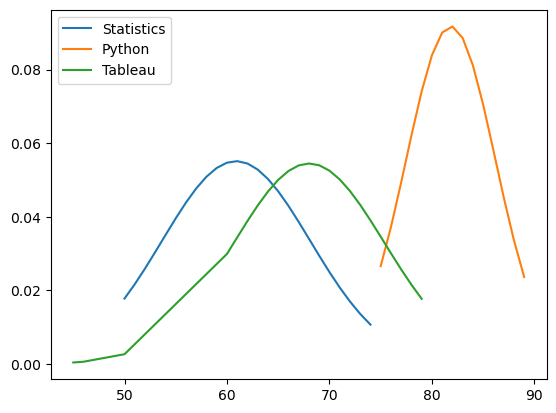

In [21]:
# Task 5
Statistics_data=sorted(Statistics_data)
Python_data=sorted(Python_data)
Tableau_data=sorted(Tableau_data)
S_mean=st.mean(Statistics_data)
S_SD=st.stdev(Statistics_data)
P_mean=st.mean(Python_data)
P_SD=st.stdev(Python_data)
T_mean=st.mean(Tableau_data)
T_SD=st.stdev(Tableau_data)
plt.plot(Statistics_data,norm.pdf(Statistics_data,S_mean,S_SD),label="Statistics")
plt.plot(Python_data,norm.pdf(Python_data,P_mean,P_SD),label="Python")
plt.plot(Tableau_data,norm.pdf(Tableau_data,T_mean,T_SD),label="Tableau")

plt.legend()
plt.show()